<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
print("--- DataFrame Information (df.info()) ---")
df.info()

print("\n--- Summary Statistics (df.describe()) ---")
print(df.describe(include='all')) # Use include='all' for all columns

--- DataFrame Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

--- Summary Statistics (df.describe()) ---
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here
print("--- Total Missing Values per Column ---")
print(df.isnull().sum())

--- Total Missing Values per Column ---
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



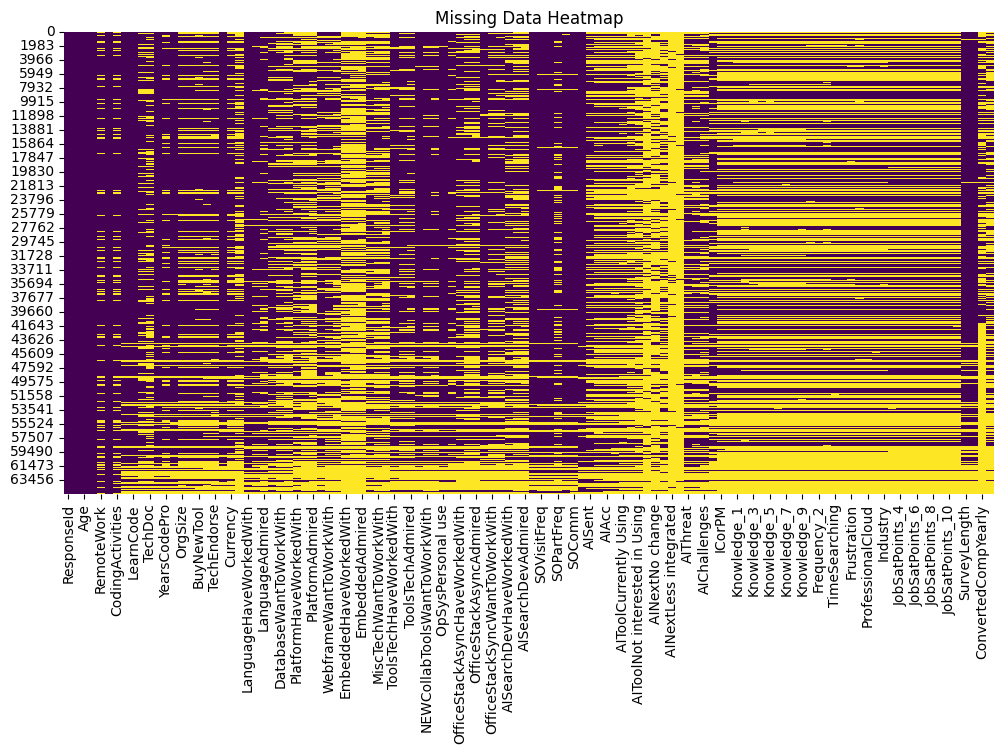

In [6]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [7]:
## Write your code here
missing_employment = df['Employment'].isnull().sum()
print(f"Number of missing values in the 'Employment' column: {missing_employment}")

Number of missing values in the 'Employment' column: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [8]:
## Write your code here
most_frequent_employment = df['Employment'].mode()[0]
print(f"Most frequent value in 'Employment' column: {most_frequent_employment}")

Most frequent value in 'Employment' column: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [ ]:
## Write your code here
df_imputed = df.copy()

missing_before = df_imputed['Employment'].isnull().sum()
print(f"Missing values in 'Employment' before imputation: {missing_before}")

most_frequent_value = df_imputed['Employment'].mode()[0]
df_imputed['Employment'].fillna(most_frequent_value, inplace=True)


missing_after = df_imputed['Employment'].isnull().sum()
print(f"Missing values in 'Employment' after imputation: {missing_after}")

print(f"\nMost frequent value used for imputation: {most_frequent_value}")
print(f"Sample of imputed values (first 5 rows where Employment was originally null):")
original_missing_indices = df[df['Employment'].isnull()].index
print(df_imputed.loc[original_missing_indices[:5], 'Employment'])

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


In [ ]:
## Write your code here

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


employment_counts_original = df['Employment'].value_counts()
axes[0].bar(employment_counts_original.index, employment_counts_original.values, color='skyblue')
axes[0].set_title('Employment Distribution (Before Imputation)', fontsize=14)
axes[0].set_xlabel('Employment Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


for i, v in enumerate(employment_counts_original.values):
    axes[0].text(i, v + max(employment_counts_original.values)*0.01, str(v), 
                ha='center', fontsize=10)


employment_counts_imputed = df_imputed['Employment'].value_counts()
axes[1].bar(employment_counts_imputed.index, employment_counts_imputed.values, color='lightgreen')
axes[1].set_title('Employment Distribution (After Imputation)', fontsize=14)
axes[1].set_xlabel('Employment Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)


for i, v in enumerate(employment_counts_imputed.values):
    axes[1].text(i, v + max(employment_counts_imputed.values)*0.01, str(v), 
                ha='center', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(employment_counts_imputed.values, labels=employment_counts_imputed.index, 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Employment Distribution After Imputation (Percentage)', fontsize=14)
plt.show()


print("Summary of imputation:")
print(f"Number of missing values replaced: {missing_before - missing_after}")
print(f"Most frequent value used: {most_frequent_value}")
print(f"\nValue counts after imputation:")
print(df_imputed['Employment'].value_counts())

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
